# Analysis 
* Observed Trend 1: The sentiments from CBS on average are the most positive compared to the other four news organizations.
* Observed Trend 2: CNN is the only news organization with an avregae negative sentiment.
* Observed Trend 3: In general for all organizations combined, the occurence of a tweet with positive or neutral sentiment is more frequent than one with a negative sentiment.

In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import json

In [2]:
# Import and initialize sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# A list to hold sentiments
sentiments = []

# Target the users
target_users = ("BBC", "CBS", "CNN", "FoxNews", "NYTimes")

# Loop through target users
for user in target_users:
    counter = 0
    
    #Loop through and get last 100 tweets for each target
    public_tweets = api.user_timeline(user, count = 100)
    for tweet in public_tweets:

        # VADER analysis
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        # Add sentiments to list
        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})
        counter = counter + 1

In [4]:
# Create data frame from all sentiments
all_sentiments = pd.DataFrame.from_dict(sentiments)
all_sentiments.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.0000,Sun Mar 11 16:00:04 +0000 2018,0.000,1.000,0.000,"By 2050, 30-50% of all species could be headin...",0,BBC
1,0.0000,Sun Mar 11 15:01:05 +0000 2018,0.000,1.000,0.000,🗑🚀 Tomorrow’s space scientists will have to de...,1,BBC
2,0.0000,Sun Mar 11 14:43:09 +0000 2018,0.000,1.000,0.000,RT @5liveSport: For the final time...\n\nThe l...,2,BBC
3,-0.0772,Sun Mar 11 14:00:04 +0000 2018,0.284,0.459,0.257,Making fake videos just got easier. https://t....,3,BBC
4,-0.5267,Sun Mar 11 12:33:04 +0000 2018,0.145,0.855,0.000,Captain America teams up with Black Widow to g...,4,BBC


In [5]:
# Export data frame to csv
all_sentiments.to_csv("all_sentiments.csv", index=False)

# Overall Media Sentiment

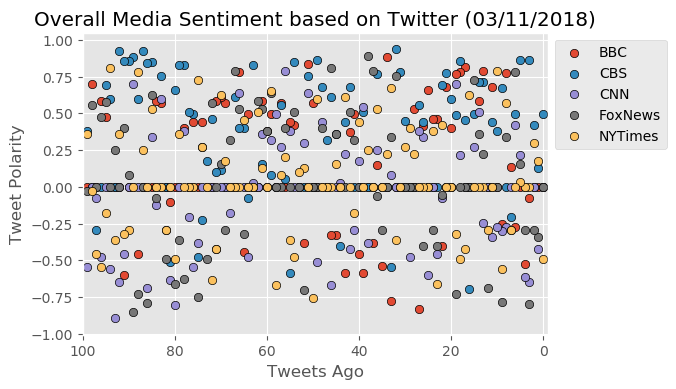

In [9]:
# Set size for chart
fig = plt.figure(dpi=100)

# Plot scatterplot
for user in target_users:
    dataframe = all_sentiments.loc[all_sentiments["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"], edgecolor="black", label = user)

# Create scatter plot settings and save as png file
plt.xlim(100, -1)
plt.legend(bbox_to_anchor = (1,1))
plt.title("Overall Media Sentiment based on Twitter (03/11/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.grid(b=True, which='major', color='1', alpha =1, linestyle='-')
plt.style.use('ggplot')
plt.savefig("Overall_Media_Sentiment_Plot")
plt.show()

In [10]:
# Group Users and calculate average
avg_sentiment = all_sentiments.groupby("User")["Compound"].mean()
avg_sentiment

User
BBC        0.140103
CBS        0.329151
CNN       -0.043815
FoxNews    0.034763
NYTimes    0.048006
Name: Compound, dtype: float64

# Sentiment Analysis of Media Tweets

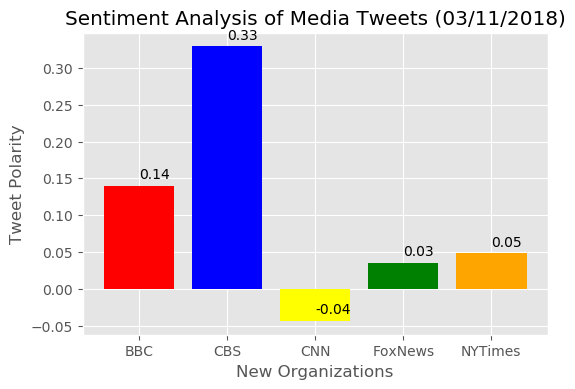

In [11]:
# Set size for chart
fig = plt.figure(dpi=100)

# Plot bar chart
count = 0
for sentiment in avg_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
    
# Create bar plot settings and save as png file
x_axis = np.arange(len(avg_sentiment))
xlabels = avg_sentiment.index
plt.bar(x_axis, avg_sentiment, tick_label = xlabels, color = ['red', 'blue', 'yellow', 'green', 'orange'])
plt.title("Sentiment Analysis of Media Tweets (03/11/2018)")
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Sentiment_Analysis_Plot")
plt.show()